###### Downloading Packages

In [ ]:
!pip install -qU transformers datasets sentencepiece

###### Logging in To HF

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

###### Tokenizer (General)

In [ ]:
import os
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

os.environ["HF_TOKEN"] = "token_goes_here"
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B", use_auth_token=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
print(tokenizer)

PreTrainedTokenizerFast(name_or_path='meta-llama/Meta-Llama-3-8B', vocab_size=128000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|begin_of_text|>', 'eos_token': '<|end_of_text|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	128000: AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128001: AddedToken("<|end_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128002: AddedToken("<|reserved_special_token_0|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128003: AddedToken("<|reserved_special_token_1|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128004: AddedToken("<|reserved_special_token_2|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128005: AddedToken("<|r

In [ ]:
sentence_english = 'Spot saw the shiny car and said, "Wow, Kitty, your car is so bright and clean!"'
sentence_igbo = 'Spot hụrụ ụgbọ ala na-egbuke egbuke wee sị, "Chei, Kitty, ụgbọ ala gị na-egbuke egbuke ma dị ọcha!"'
sentence_yoruba = 'Spọtí rí ọkọ́ ayọkẹlẹ didán náà, O si yà ẹnu rẹ̀,kití,ọkọ́ rẹ̀ mọlẹ o si mọ̀!"'

tokenized_english = tokenizer.tokenize(sentence_english)
tokenized_igbo = tokenizer.tokenize(sentence_igbo)
tokenized_yoruba = tokenizer.tokenize(sentence_yoruba)

print(tokenized_english)
print(tokenized_igbo)
print(tokenized_yoruba)

['Spot', 'Ġsaw', 'Ġthe', 'Ġshiny', 'Ġcar', 'Ġand', 'Ġsaid', ',', 'Ġ"', 'Wow', ',', 'ĠKitty', ',', 'Ġyour', 'Ġcar', 'Ġis', 'Ġso', 'Ġbright', 'Ġand', 'Ġclean', '!"']
['Spot', 'Ġh', 'á»¥', 'r', 'á»¥', 'Ġ', 'á»¥', 'gb', 'á»į', 'Ġal', 'a', 'Ġna', '-', 'eg', 'b', 'uke', 'Ġeg', 'b', 'uke', 'Ġwee', 'Ġs', 'á»ĭ', ',', 'Ġ"', 'Che', 'i', ',', 'ĠKitty', ',', 'Ġ', 'á»¥', 'gb', 'á»į', 'Ġal', 'a', 'Ġg', 'á»ĭ', 'Ġna', '-', 'eg', 'b', 'uke', 'Ġeg', 'b', 'uke', 'Ġma', 'Ġdá»ĭ', 'Ġ', 'á»į', 'cha', '!"']
['Sp', 'á»į', 'tÃŃ', 'Ġr', 'ÃŃ', 'Ġ', 'á»į', 'k', 'á»į', 'Ìģ', 'Ġay', 'á»į', 'k', 'áº¹', 'l', 'áº¹', 'Ġdid', 'Ã¡n', 'ĠnÃ¡', 'Ãł', ',', 'ĠO', 'Ġsi', 'Ġy', 'Ãł', 'Ġ', 'áº¹', 'nu', 'Ġr', 'áº¹', 'ÌĢ', ',', 'kit', 'ÃŃ', ',', 'á»į', 'k', 'á»į', 'Ìģ', 'Ġr', 'áº¹', 'ÌĢ', 'Ġm', 'á»į', 'l', 'áº¹', 'Ġo', 'Ġsi', 'Ġm', 'á»į', 'ÌĢ', '!"']


In [ ]:
print(f"English: {len(sentence_english.split())} words vs {len(tokenized_english)} tokens")
print(f"Igbo: {len(sentence_igbo.split())} words vs {len(tokenized_igbo)} tokens")
print(f"Yoruba: {len(sentence_yoruba.split())} words vs {len(tokenized_yoruba)} tokens")

English: 16 words vs 21 tokens
Igbo: 18 words vs 51 tokens
Yoruba: 16 words vs 52 tokens


###### Loading HF Data

In [ ]:
from datasets import load_dataset

# Using Tiny Stories
yoruba_dataset = load_dataset("ccibeekeoc42/TinyStories_yoruba")
igbo_dataset = load_dataset("ccibeekeoc42/TinyStories_igbo")
# Selecting First 1000
yoruba_dataset["train"] = yoruba_dataset["train"].select(range(1000))
igbo_dataset["train"] = igbo_dataset["train"].select(range(1000))

# Loading the Overall Dataset
dataset = load_dataset("ccibeekeoc42/low_resource_multilingual_sft_short2")

###### Tokenizer (per Language)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data_lengths(tokenized_train_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
    # lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
    print(f"Min token length: {np.min(lengths)}")
    print(f"Median token length: {np.median(lengths)}")
    print(f"Average token length: {np.average(lengths)}")
    print(f"Max token length: {np.max(lengths)}")
    print(f"Standard deviation: {np.std(lengths)}")
    print(f"Number of sequences (count of sentences): {len(lengths)}")
    print(f"Total Number of tokens (count of data): {sum(lengths)}")

    # Plotting the histogram
    #plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')
    plt.title('Token Length Histogram')
    # plt.xlim([0, 1500])
    plt.show()

In [ ]:
def seperate_language_prompt(sample, lng="English"):
  """
  Update the prompt template:
  Combine both the English and Igbo into a single column.
  """
  bos_token = "<s>"
  input = sample[lng.capitalize()].strip()
  eos_token = "</s>"

  full_prompt = ""
  full_prompt += bos_token
  full_prompt += "[INST]"
  full_prompt += input + "[/INST]"
  full_prompt += eos_token

  return full_prompt

Min token length: 58
Median token length: 184.0
Average token length: 194.786
Max token length: 664
Standard deviation: 59.705780323181436
Number of sequences (count of sentences): 1000
Total Number of tokens (count of data): 194786


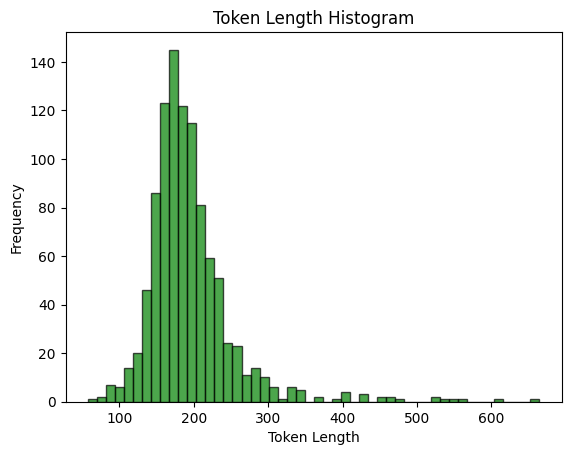

In [ ]:
# Tokenizing English
def tokenize_prompts(prompt):
    return tokenizer(seperate_language_prompt(prompt))

eng_tokenized_dataset = yoruba_dataset["train"].map(tokenize_prompts)
plot_data_lengths(eng_tokenized_dataset)

Min token length: 118
Median token length: 376.0
Average token length: 398.865
Max token length: 1816
Standard deviation: 135.2923160234904
Number of sequences (count of sentences): 1000
Total Number of tokens (count of data): 398865


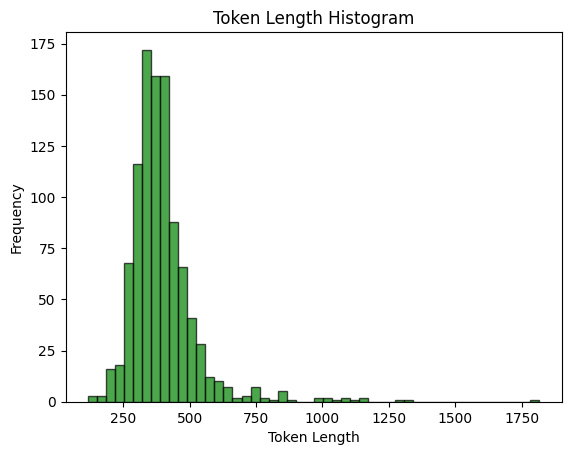

In [ ]:
# Tokenizing Igbo
def tokenize_prompts(prompt):
    return tokenizer(seperate_language_prompt(prompt, lng="igbo"))

igbo_tokenized_dataset = igbo_dataset["train"].map(tokenize_prompts)
plot_data_lengths(igbo_tokenized_dataset)

Min token length: 133
Median token length: 484.0
Average token length: 503.132
Max token length: 1436
Standard deviation: 146.25938115553478
Number of sequences (count of sentences): 1000
Total Number of tokens (count of data): 503132


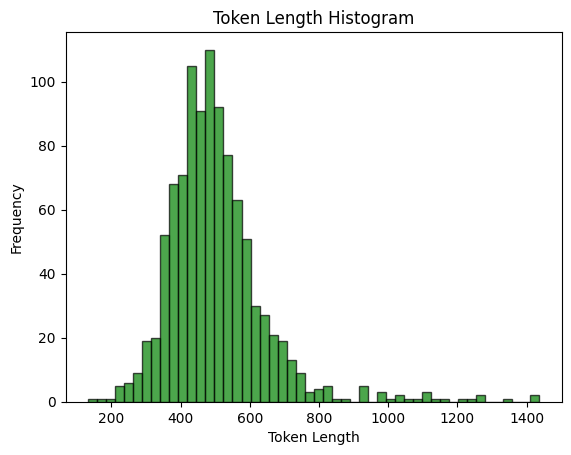

In [ ]:
# Tokenizing Igbo
def tokenize_prompts(prompt):
    return tokenizer(seperate_language_prompt(prompt, lng="yoruba"))

yoruba_tokenized_dataset = yoruba_dataset["train"].map(tokenize_prompts)
plot_data_lengths(yoruba_tokenized_dataset)

Statistics for English dataset:
  Min token length: 58
  Median token length: 184.0
  Average token length: 194.786
  Max token length: 664
  Standard deviation: 59.705780323181436
  Number of sequences: 1000

Statistics for Igbo dataset:
  Min token length: 118
  Median token length: 376.0
  Average token length: 398.865
  Max token length: 1816
  Standard deviation: 135.2923160234904
  Number of sequences: 1000

Statistics for Yoruba dataset:
  Min token length: 133
  Median token length: 484.0
  Average token length: 503.132
  Max token length: 1436
  Standard deviation: 146.25938115553478
  Number of sequences: 1000



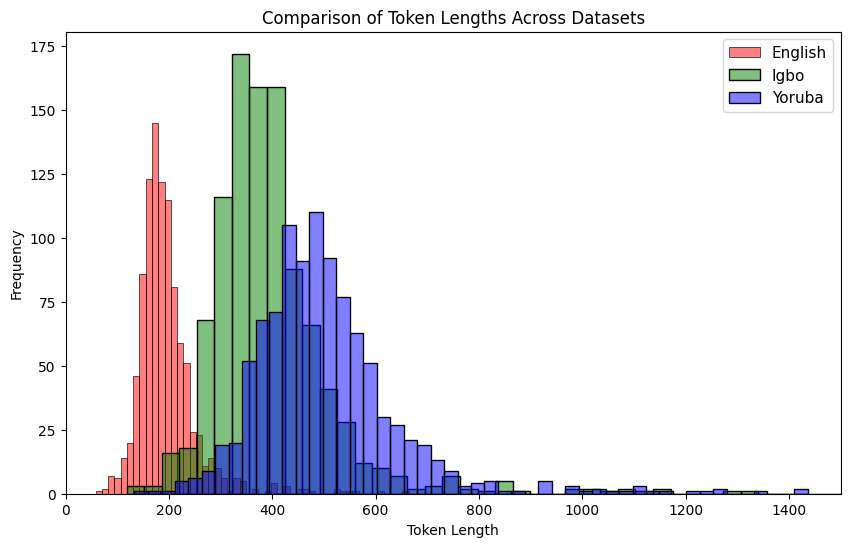

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data_lengths(tokenized_dataset1, tokenized_dataset2, tokenized_dataset3):
    # Extracting token lengths from each dataset
    lengths1 = [len(x['input_ids']) for x in tokenized_dataset1]
    lengths2 = [len(x['input_ids']) for x in tokenized_dataset2]
    lengths3 = [len(x['input_ids']) for x in tokenized_dataset3]

    # Print statistics for each dataset
    datasets = [lengths1, lengths2, lengths3]
    labels = ['English', 'Igbo', 'Yoruba']
    colors = ['red', 'green', 'blue']

    for lengths, label in zip(datasets, labels):
        print(f"Statistics for {label} dataset:")
        print(f"  Min token length: {np.min(lengths)}")
        print(f"  Median token length: {np.median(lengths)}")
        print(f"  Average token length: {np.average(lengths)}")
        print(f"  Max token length: {np.max(lengths)}")
        print(f"  Standard deviation: {np.std(lengths)}")
        print(f"  Number of sequences: {len(lengths)}\n")

    # Plot settings
    plt.figure(figsize=(10, 6))
    plt.xlim([0, 1500])
    for lengths, label, color in zip(datasets, labels, colors):
        sns.histplot(lengths, bins=50, alpha=0.5, color=color, edgecolor='black', label=label)

    plt.xlabel('Token Length')
    plt.ylabel('Frequency')
    plt.title('Comparison of Token Lengths Across Datasets')
    plt.legend(title_fontsize='13', fontsize='11')
    plt.show()

# Example usage:
plot_data_lengths(eng_tokenized_dataset, igbo_tokenized_dataset, yoruba_tokenized_dataset)

###### Tokenizer (General)

In [ ]:
def tokenize_prompts(prompt):
    return tokenizer(prompt['prompt_response'])

tokenized_train_dataset = dataset["train"].map(tokenize_prompts)
tokenized_val_dataset = dataset["validation"].map(tokenize_prompts)

Min token length: 34
Median token length: 211.0
Average token length: 356.8527690020442
Max token length: 4360
Standard deviation: 310.2468223884434
Number of sequences (count of sentences): 21524
Total Number of tokens (count of data): 7680899


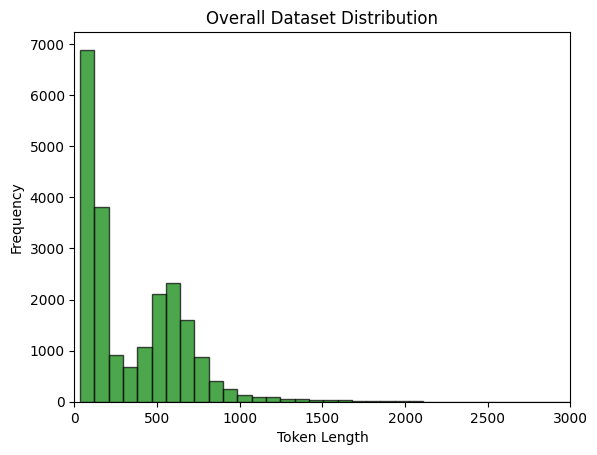

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
    lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
    print(f"Min token length: {np.min(lengths)}")
    print(f"Median token length: {np.median(lengths)}")
    print(f"Average token length: {np.average(lengths)}")
    print(f"Max token length: {np.max(lengths)}")
    print(f"Standard deviation: {np.std(lengths)}")
    print(f"Number of sequences (count of sentences): {len(lengths)}")
    print(f"Total Number of tokens (count of data): {sum(lengths)}")

    # Plotting the histogram
    #plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')
    plt.title('Overall Dataset Distribution')
    plt.xlim([0, 3000])
    plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)